In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
concrete = pd.read_csv('concrete.csv')

In [75]:
print (concrete.shape)
concrete.head() 

(1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [76]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [77]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [78]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


D:\AIML\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


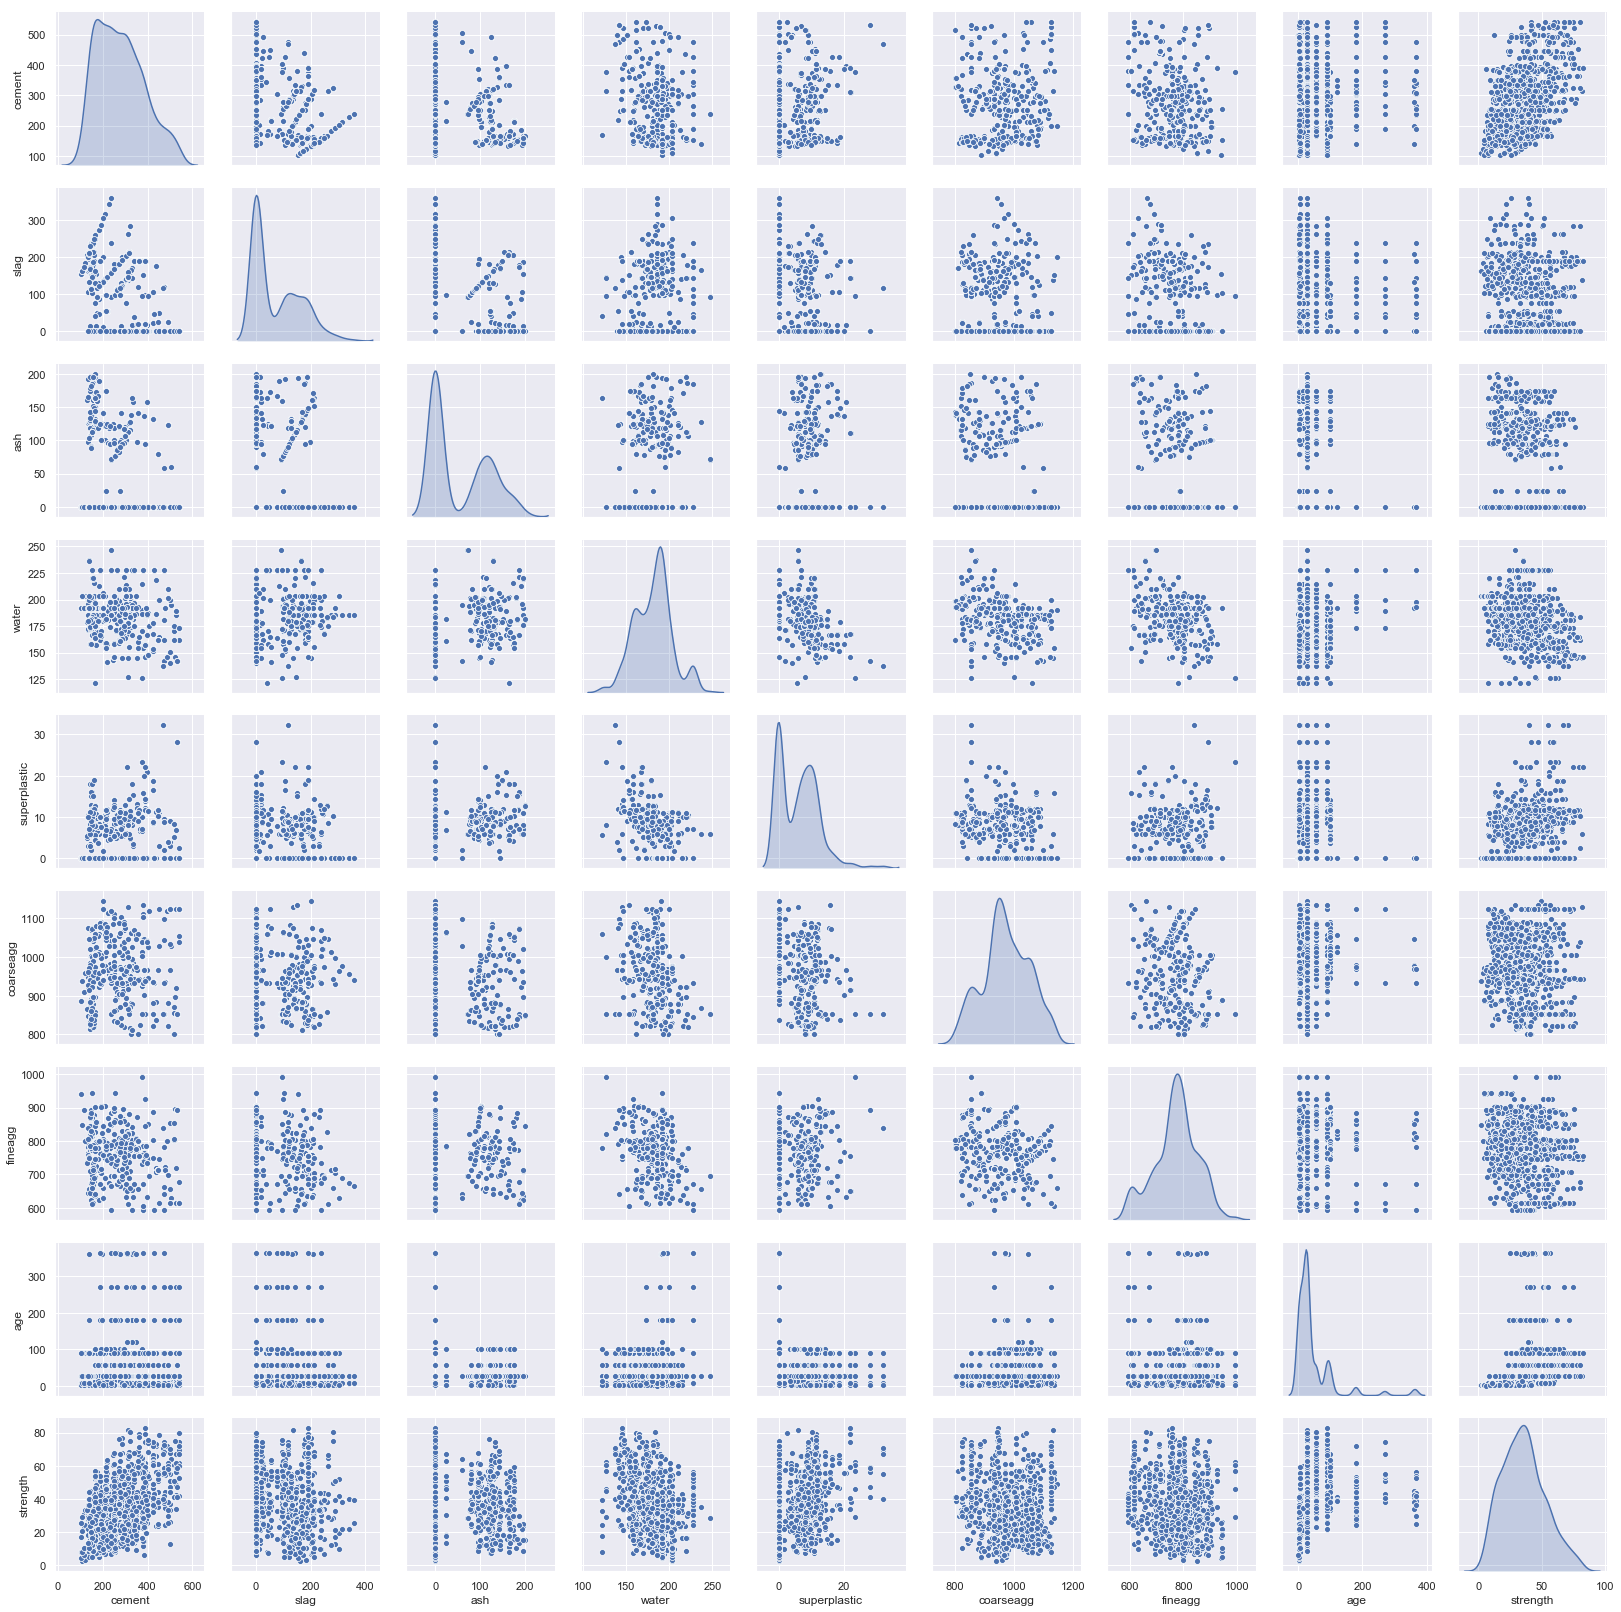

In [79]:
sns.pairplot(concrete, diag_kind='kde')

### Observations

1. We can see there are data point clouds as a relation between attributes.
2. However we can see for the target column('strength'), there is some relation with 'cement'.
3. And relation between columns 'ash' with 'slag' and 'cement' with 'slag'


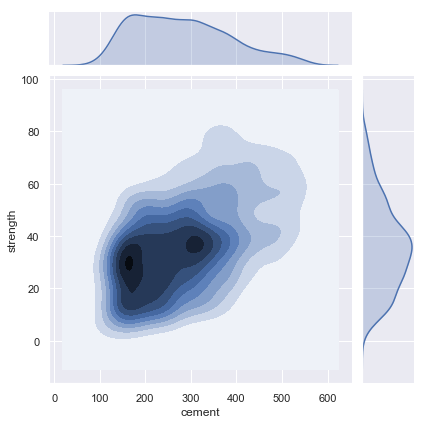

In [80]:
sns.jointplot(concrete.cement, concrete.strength, kind='kde')

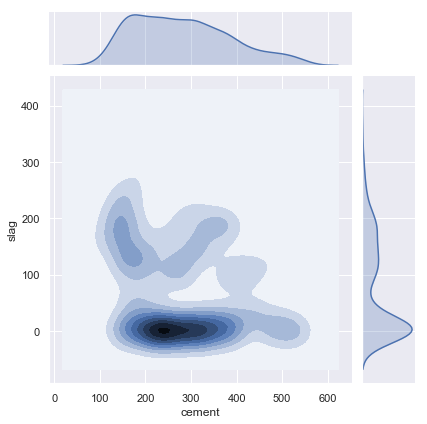

In [81]:
sns.jointplot(concrete.cement, concrete.slag, kind='kde')

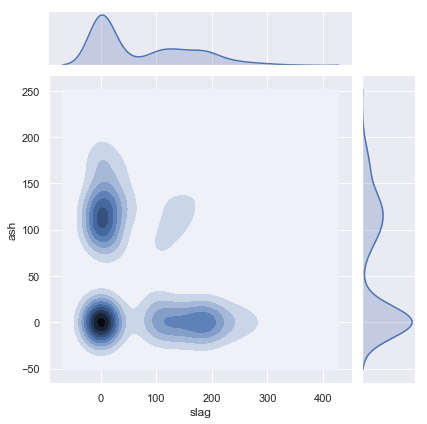

In [82]:
sns.jointplot(concrete.slag, concrete.ash, kind='kde')

In [83]:
from scipy.stats import zscore

concrete_z = zscore(concrete)

In [84]:
concrete_z_df = pd.DataFrame(concrete_z, columns=concrete.columns)
concrete_z_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.858833e-16,9.593189e-18,3.634633e-16,-2.014570e-16,1.103756e-16,7.116206e-16,9.537139e-16,3.794160e-17,-3.729487e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01,-2.005552e+00
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01,-7.251305e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01,-8.222491e-02
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01,6.178744e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00,2.801717e+00


In [85]:
x, y = concrete_z_df.iloc[:, :9], concrete_z_df.strength

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

from sklearn import svm

clr = svm.SVR(gamma='scale')
clr.fit(x_train, y_train)
y_pred = clr.predict(x_test)

D:\AIML\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


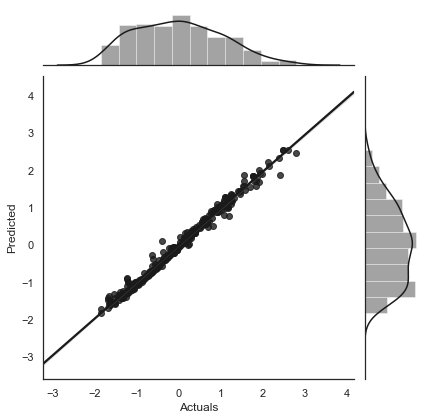

In [86]:
import seaborn as sns
import seaborn as sns

sns.set(style='darkgrid', color_codes=True)

with sns.axes_style('white'):
    r = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='k')
    r.set_axis_labels('Actuals', 'Predicted')
    

In [87]:
clr.score(x_test,y_test)

0.9886807049175834

### We have a score of 99%

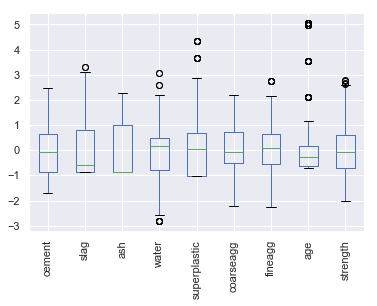

In [88]:

concrete_z_df.boxplot()
plt.xticks(rotation=90)
plt.show()

### Identification of Outliers

We can see that there are outliers in various columns mainly in
- slag
- water
- superplastic
- fineagg
- age
- strength

In [89]:
# Handling outliers

def replace(d):
    m, s = d.median(), d.std()
    o    =   (d - m).abs() > 3*s
    d[o] = m
    
    return d
    
data_corrected = concrete_z_df.transform(replace)


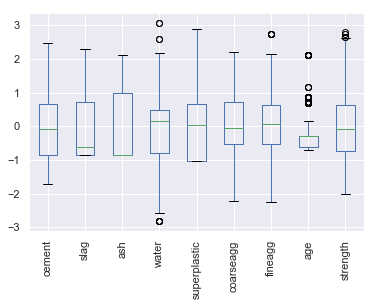

In [90]:
data_corrected.boxplot()
plt.xticks(rotation=90)
plt.show()

D:\AIML\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


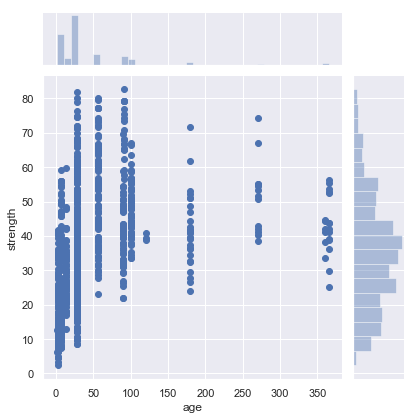

In [91]:
sns.jointplot(concrete.age, concrete.strength)

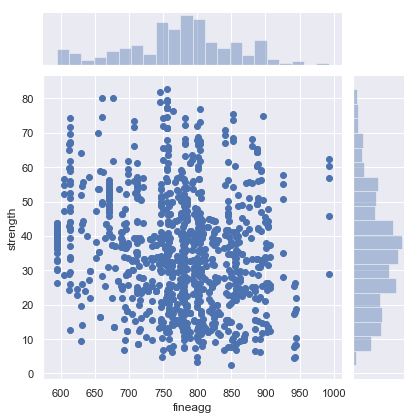

In [92]:
sns.jointplot(concrete.fineagg, concrete.strength)

### Drop Un related columns
As can see that 'Age' and 'fineagg' columns has no specific relation with strength we can eliminate them

In [93]:
data_corrected = data_corrected.drop(['age', 'fineagg'], axis=1)

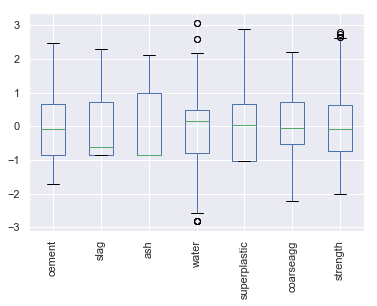

In [94]:
data_corrected.boxplot()
plt.xticks(rotation=90)
plt.show()

In [120]:
x, y = data_corrected.iloc[:, :6], data_corrected.strength

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

from sklearn import svm

clr = svm.SVR(gamma='scale')
clr.fit(x_train, y_train)
y_pred = clr.predict(x_test)

clr.score(x_test,y_test)

0.48281275792509487

D:\AIML\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


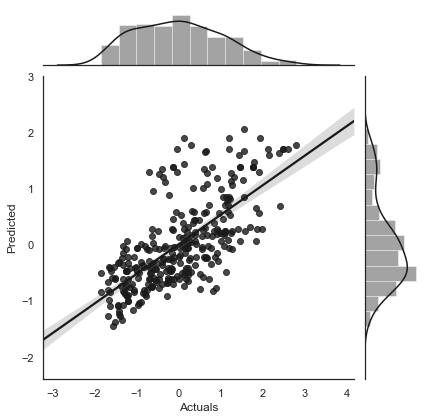

In [121]:

sns.set(style='darkgrid', color_codes=True)

with sns.axes_style('white'):
    r = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='k')
    r.set_axis_labels('Actuals', 'Predicted')

### Using various models 

In [185]:
# USing various Linear Regression for findings
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.linear_model import LinearRegression
le = LinearRegression()

le.fit(x_train, y_train)
le_y_pred = clr.predict(x_test)

print("Train Score:",le.score(x_train,y_train))
print("Test Score:",le.score(x_test,y_test))

sqrt(mean_squared_error(y_test, le_y_pred))

Train Score: 0.4470431656298216
Test Score: 0.43739261073624547


0.7347592622584789

In [186]:
data_train = pd.concat([x_train, y_train], axis=1)

data_train.head()


,cement,slag,ash,water,superplastic,coarseagg,strength
185,0.658961,-0.856888,-0.847144,1.004164,-1.039143,0.013910,-0.795799
286,0.888723,1.337055,-0.847144,-0.537264,0.652383,-0.602435,1.741687
600,-0.039901,-0.856888,-0.847144,0.441941,-1.039143,-0.063294,-1.464756
691,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-0.179544
474,0.716401,-0.856888,1.372788,0.535645,0.803113,-2.212138,0.302560


In [187]:
import statsmodels.api as sm

lm1 = sm.OLS(y_train, x_train)

model_f = lm1.fit()

model_f.params


cement          0.609488
slag            0.329957
ash             0.094267
water          -0.135583
superplastic    0.193997
coarseagg      -0.016655
dtype: float64

In [188]:
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     95.93
Date:                Thu, 23 May 2019   Prob (F-statistic):           2.63e-88
Time:                        23:01:42   Log-Likelihood:                -803.30
No. Observations:                 721   AIC:                             1619.
Df Residuals:                     715   BIC:                             1646.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cement           0.6095      0.036     16.794      0.000       0.538       0.681
slag             0.3300      0.040      8.180      0.000       0.251       0.409
ash              0.0943      0.042      2.232      0.026       0.011       0.177
water           -0.1356      0.038     -3.523      0.000      -0.211      -0.060
superplastic     0.1940      0.049      3.954      0.000       0.098       0.290
coarseagg       -0.0167      0.033     -0.503      0.615      -0.082       0.048
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.923
Skew:                           0.103   Prob(JB):                        0.382
Kurtosis:                       2.853   Cond. No.                         3.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
pred = model_f.predict(x_test)

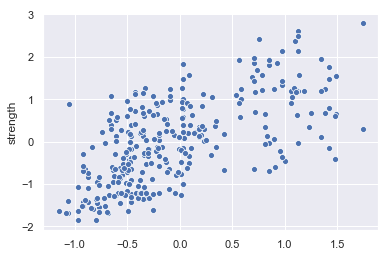

In [190]:
sns.scatterplot(x=pred, y=y_test)

In [191]:
# Decission Tree

from sklearn.tree import DecisionTreeRegressor
dtree= DecisionTreeRegressor()

dtree.fit(x_train, y_train)
dtree_y_pred = dtree.predict(x_test)

dtree.score(x,y)

print("Train Score:",dtree.score(x_train,y_train))
print("Test Score:",dtree.score(x_test,y_test))

sqrt(mean_squared_error(y_test, dtree_y_pred))


Train Score: 0.672896424097424
Test Score: 0.3201883770049284


0.8423943796462936

In [192]:
# Random forest

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
rf= RandomForestRegressor()

rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)


print("Train Score:",rf.score(x_train,y_train))
print("Test Score:",rf.score(x_test,y_test))

sqrt(mean_squared_error(y_test, rf_y_pred))

Train Score: 0.6503059791171073
Test Score: 0.3937184622471067


D:\AIML\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7955332563815231

In [193]:
# Bagging
bgg = BaggingRegressor()

bgg.fit(x_train, y_train)
bgg_y_pred = bgg.predict(x_test)

bgg.score(x_test,y_test)

print("Train Score:",bgg.score(x_train,y_train))
print("Test Score:",bgg.score(x_test,y_test))
sqrt(mean_squared_error(y_test, bgg_y_pred))

Train Score: 0.6501572834789628
Test Score: 0.36976140979203753


0.8110986224676089

In [213]:
# Gradient Boosting

grd = GradientBoostingRegressor()

grd.fit(x, y)
y_pred_grd = grd.predict(x_test)



print("Train Score:",grd.score(x_train,y_train))
print("Test Score:",grd.score(x,y))

sqrt(mean_squared_error(y_test, y_pred_grd))

Train Score: 0.5965343438873141
Test Score: 0.6139881761611392


0.6025157657457975

In [232]:
# RMSE scores

print ('Linear Regression: ',sqrt(mean_squared_error(y_test, le_y_pred)))
print ('Decision Tree: ',sqrt(mean_squared_error(y_test, dtree_y_pred)))
print ('Random Forest: ',sqrt(mean_squared_error(y_test, rf_y_pred)))
print ('Bagging: ',sqrt(mean_squared_error(y_test, bgg_y_pred)))
print ('Gradient Boosting: ',sqrt(mean_squared_error(y_test, y_pred_grd)))

Linear Regression:  0.7347592622584789
Decision Tree:  0.8423943796462936
Random Forest:  0.7955332563815231
Bagging:  0.8110986224676089
Gradient Boosting:  0.6025157657457975


In [230]:
# R2 values for above models


print ('Linear Regression: ',le.score(x_test,y_test))
print ('Decision Tree: ', dtree.score(x_test,y_test))
print ('Random Forest: ', rf.score(x_test,y_test))
print ('Bagging: ', bgg.score(x_test,y_test))
print ('Gradient Boosting: ', grd.score(x_test,y_test))

Linear Regression:  0.43739261073624547
Decision Tree:  0.3201883770049284
Random Forest:  0.3937184622471067
Bagging:  0.36976140979203753
Gradient Boosting:  0.6522280943545344


In [236]:
# Gradient Boosting + Adaboost

from sklearn.ensemble import AdaBoostRegressor

ad_grd = AdaBoostRegressor(base_estimator=grd, n_estimators=100)

ad_grd.fit(x_train, y_train)

ad_pred = ad_grd.predict(x_test)

print ("R2 score Regression using GradientBoosting and AdaBoost:",ad_grd.score(x_test,y_test))
print ('RMSE for Gradient + Ada Boosting : ',sqrt(mean_squared_error(y_test, ad_pred)))

R2 score Regression using GradientBoosting and AdaBoost: 0.4654299790974648
RMSE for Gradient + Ada Boosting :  0.7470049292392785


### As per above analysis, Gradient Boosting seems to perform better

1. R2 value = 0.65
2. RMSE value = 0.60
